# Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
from scipy.stats import chi2
from scipy.stats import norm
from scipy.optimize import minimize
import emcee
import corner

# Question:1

Time taken to produce 10000 uniform deviates= 1.9288063049316406 ms


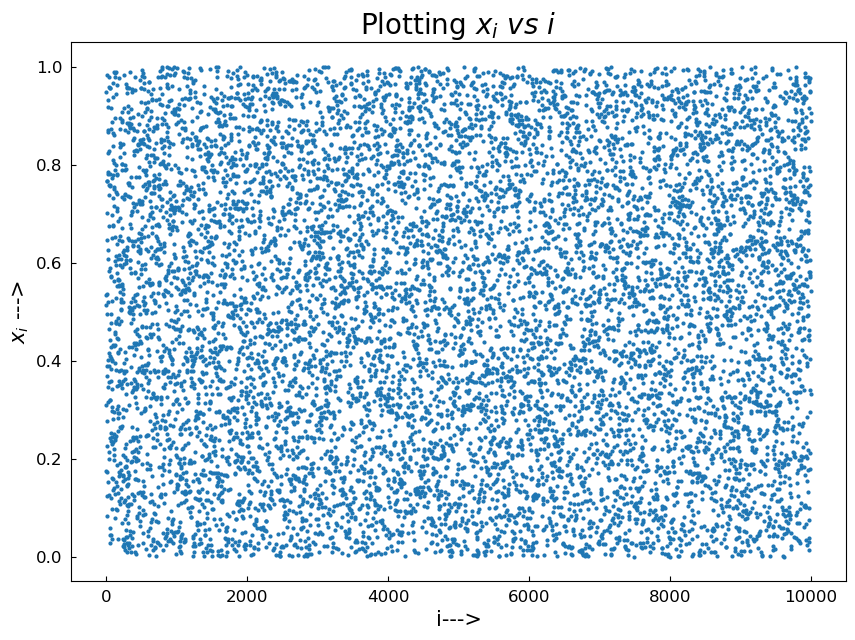

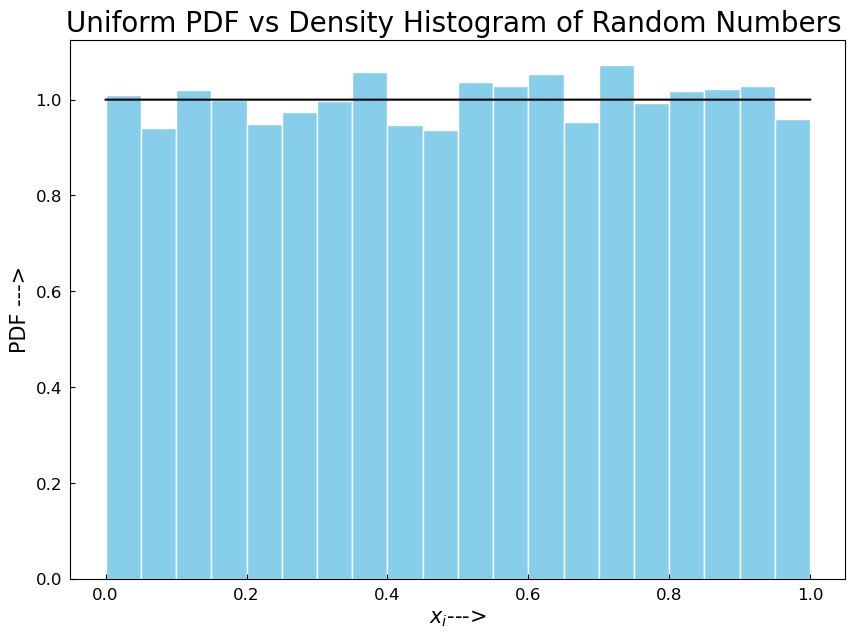

In [239]:
a = 1103515245                      #Multiplier
c = 12345                           #Increment
x = 1                               #Seed
m = 2**(31)                         #Modulus

npoints = 10000                      #Number of points
randnos = []                        #Array for random numbers
ivalues = []                        #Array for indices

#Linear Congruential Generator
start_time = tm.time()
for i in range(npoints):
    x = (a*x + c)%m
    randnos.append(x/(m-1))         #Scaling the numbers between [0,1]
end_time = tm.time()
elapsed_time = (end_time - start_time)*1000             #Elapsed time in ms
print('Time taken to produce 10000 uniform deviates=',elapsed_time,'ms')
for i in range(npoints):
    ivalues.append(i)

#Plotting x_i vs i
plt.figure(0)
plt.scatter(ivalues,randnos, s=4)
plt.xlabel('i--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel(r'$x_i$ --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title(r'Plotting $x_i\ vs\ i$',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Uniform PDF between [0,1]
def uni(x):
    if 0<=x<=1:
        return 1
    else:
        return 0
xvalues = np.linspace(0,1,10000)
yvalues = []
for i in range(len(xvalues)):
    yvalues.append(uni(xvalues[i]))

#Plotting density histogram vs Uniform pdf
plt.figure(1)
plt.plot(xvalues,yvalues, color='black')
plt.hist(randnos, range=(0,1), density = True, bins = 20, alpha = 1, color = 'skyblue',edgecolor='white')
plt.xlabel(r'$x_i$--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Uniform PDF vs Density Histogram of Random Numbers ',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Question:2

Time taken to produce 10000 uniform deviates= 0.6365776062011719 ms


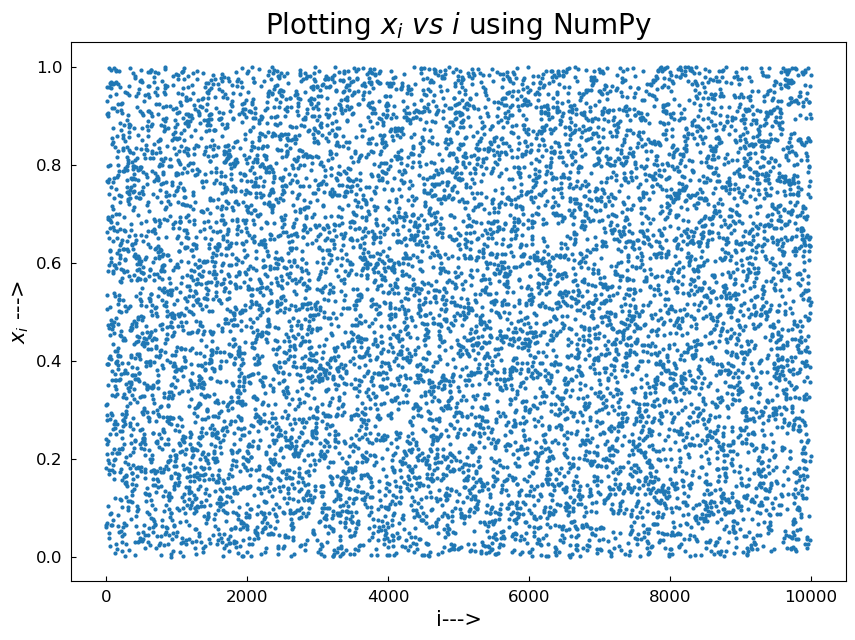

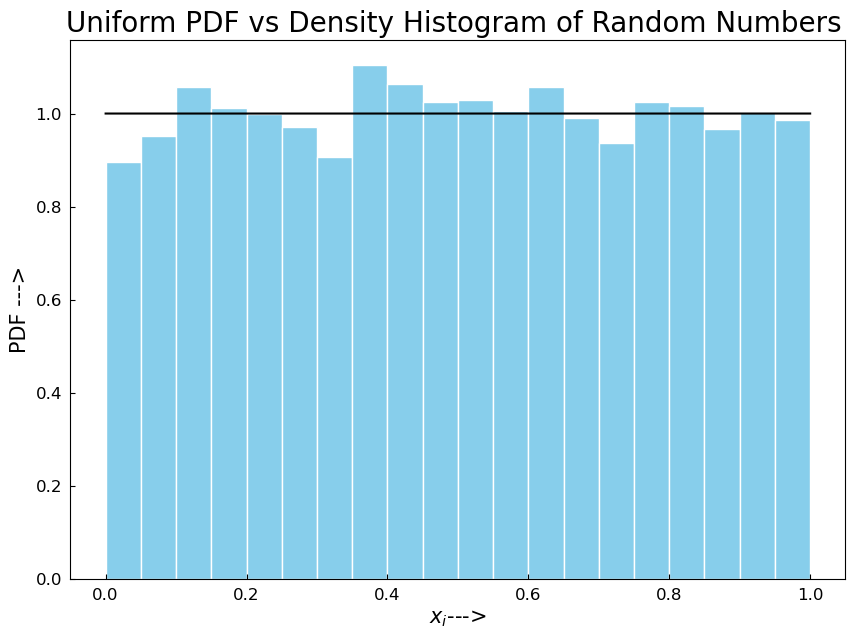

In [240]:
#Generating random numbers between [0,1] using NumPy
start_time = tm.time()
randnos = np.random.rand(10000)
end_time = tm.time()
elapsed_time = (end_time - start_time)*1000             #Elapsed time in ms
print('Time taken to produce 10000 uniform deviates=',elapsed_time,'ms')
ivalues = []
for i in range(len(randnos)):
    ivalues.append(i)

#Plotting x_i vs i
plt.figure(0)
plt.scatter(ivalues,randnos, s=4)
plt.xlabel('i--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel(r'$x_i$ --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title(r'Plotting $x_i\ vs\ i$ using NumPy',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Uniform PDF between [0,1]
def uni(x):
    if 0<=x<=1:
        return 1
    else:
        return 0
xvalues = np.linspace(0,1,10000)
yvalues = []
for i in range(len(xvalues)):
    yvalues.append(uni(xvalues[i]))

#Plotting density histogram vs Uniform pdf
plt.figure(1)
plt.plot(xvalues,yvalues, color='black')
plt.hist(randnos, range=(0,1), density = True, bins = 20, alpha = 1, color = 'skyblue',edgecolor= 'white')
plt.xlabel(r'$x_i$--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Uniform PDF vs Density Histogram of Random Numbers ',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Question:3

#### From question 1 and 2, we get:
##### Time taken by LCG to produce 10,000 uniform deviates = 1.9288063049316406 ms
##### Time taken by Numpy to produce 10,000 uniform deviates = 0.6365776062011719 ms

# Question:4

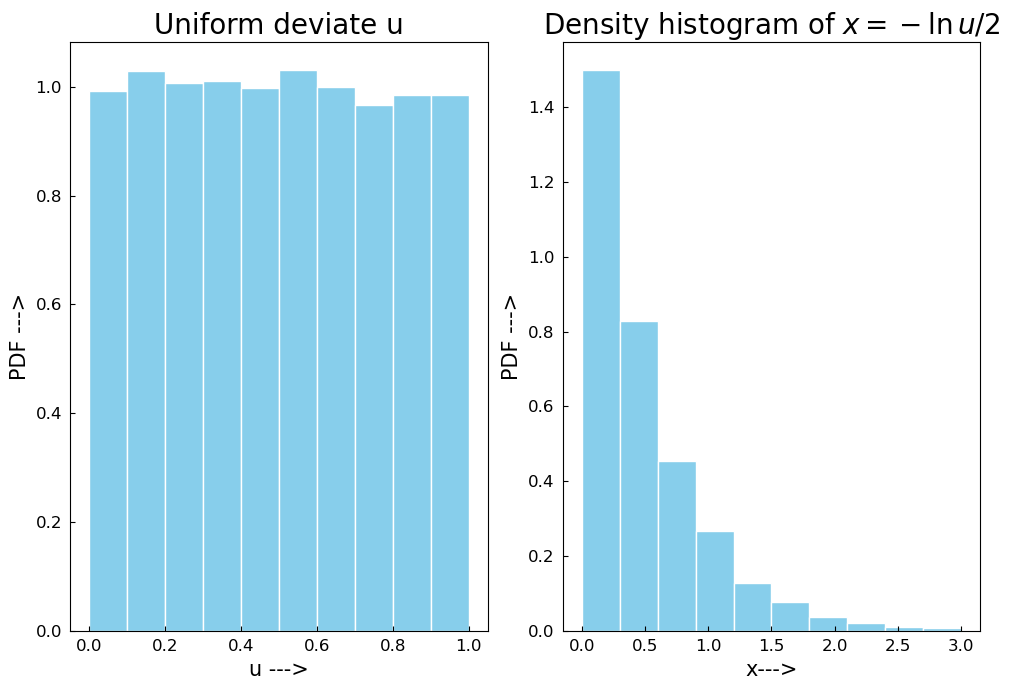

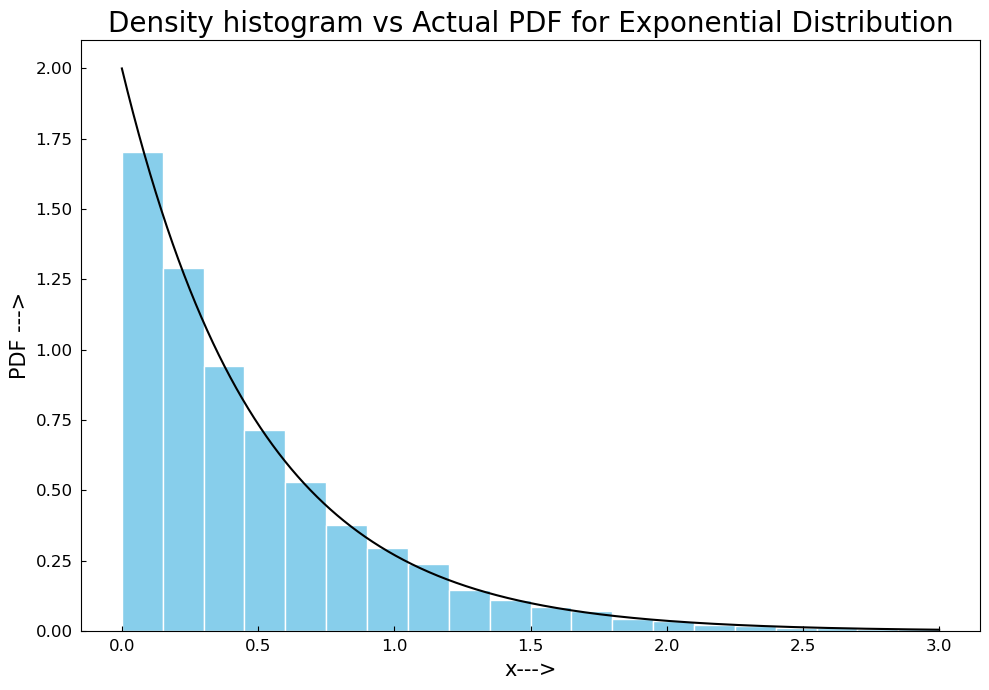

In [237]:
#Exponential distribution with mean=0.5
def expdf(x):
    return 2*np.exp(-2*x)
x = np.linspace(0,3,10000)
y = expdf(x)

#Reading data from the 'ques4.txt' file
udata, xdata = np.loadtxt('ques4.txt', unpack= True)

#Plotting the density histograms for udata and xdata
plt.figure(0)
plt.subplot(1,2,1)
plt.hist(udata, range=(0,1), density = True, bins = 10, alpha = 1, color = 'skyblue', edgecolor='white')
plt.xlabel('u --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Uniform deviate u',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1,2,2)
plt.hist(xdata, range=(0,3), density = True, bins = 10, alpha = 1, color = 'skyblue', edgecolor='white')
plt.xlabel('x--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title(r'Density histogram of $x=-\ln{u}/2$',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#Plotting density histogram of 'xdata' vs exponential PDF
plt.figure(1)
plt.plot(x, y, linewidth=1.5, color='black')
plt.hist(xdata, range=(0,3), density = True, bins = 20, alpha = 1, color = 'skyblue', edgecolor='white')
plt.xlabel('x--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title(r'Density histogram vs Actual PDF for Exponential Distribution',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Question:5

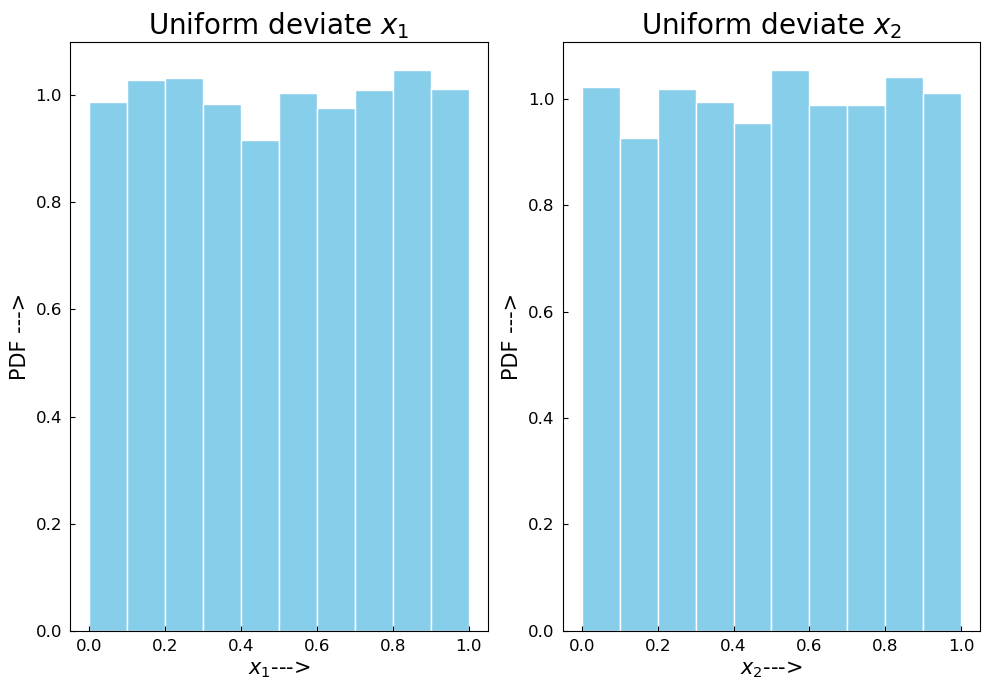

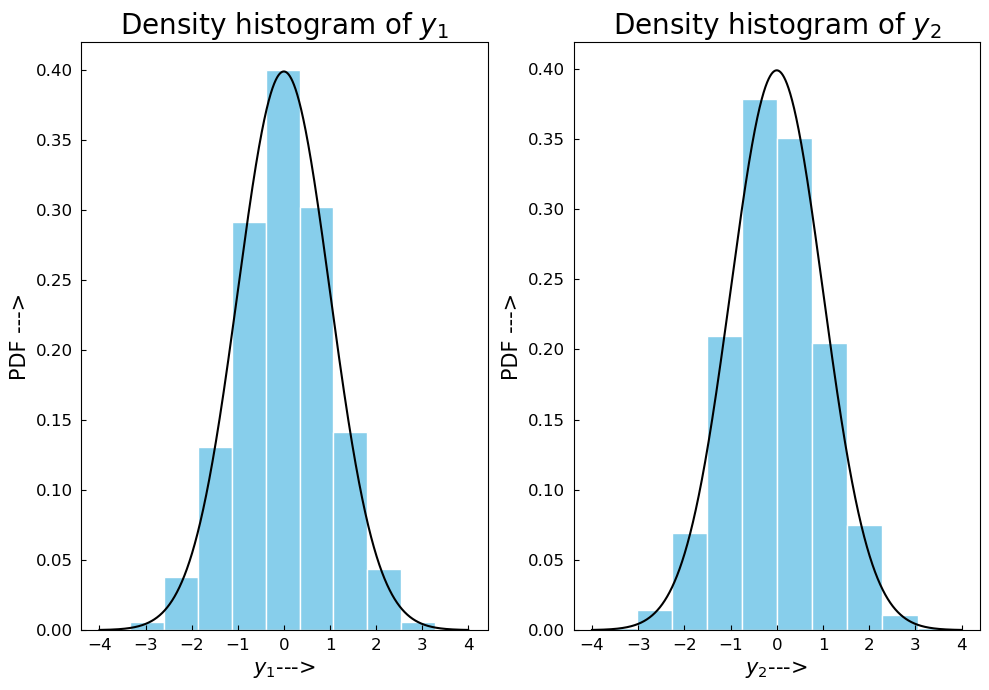

In [182]:
#Uniform deviates between [0,1]
x1 = np.random.rand(10000)
x2 = np.random.rand(10000)

#Plotting histograms of uniform deviates
plt.figure(0)
plt.subplot(1,2,1)
plt.hist(x1, range=(0,1), density = True, bins = 10, alpha = 1, color = 'skyblue', edgecolor='white')
plt.xlabel(r'$x_1$--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Uniform deviate $x_1$',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1,2,2)
plt.hist(x2, range=(0,1), density = True, bins = 10, alpha = 1, color = 'skyblue', edgecolor='white')
plt.xlabel(r'$x_2$--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Uniform deviate $x_2$',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#Box-Muller method to obtain Gaussian distribution
y1 = (np.sqrt(-2*np.log(x1)))*(np.cos(2*np.pi*x2))
y2 = (np.sqrt(-2*np.log(x1)))*(np.sin(2*np.pi*x2))

#Standard Gaussian distribution
def stdgauss(x):
    return (np.exp(-x*x/2))/(np.sqrt(2*np.pi))
x = np.linspace(-4,4,10000)
y = stdgauss(x)


#Plotting density histogram from Box-Muller method vs standard Gaussian distribution
plt.figure(1)
plt.subplot(1,2,1)
plt.hist(y1, density = True, bins = 10, alpha = 1, color = 'skyblue', edgecolor='white')
plt.plot(x,y, linewidth=1.5,color='black')
plt.xlabel(r'$y_1$--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Density histogram of $y_1$',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1,2,2)
plt.hist(y2, density = True, bins = 10, alpha = 1, color = 'skyblue', edgecolor='white')
plt.plot(x,y, linewidth=1.5,color='black')
plt.xlabel(r'$y_2$--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Density histogram of $y_2$',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Question:6

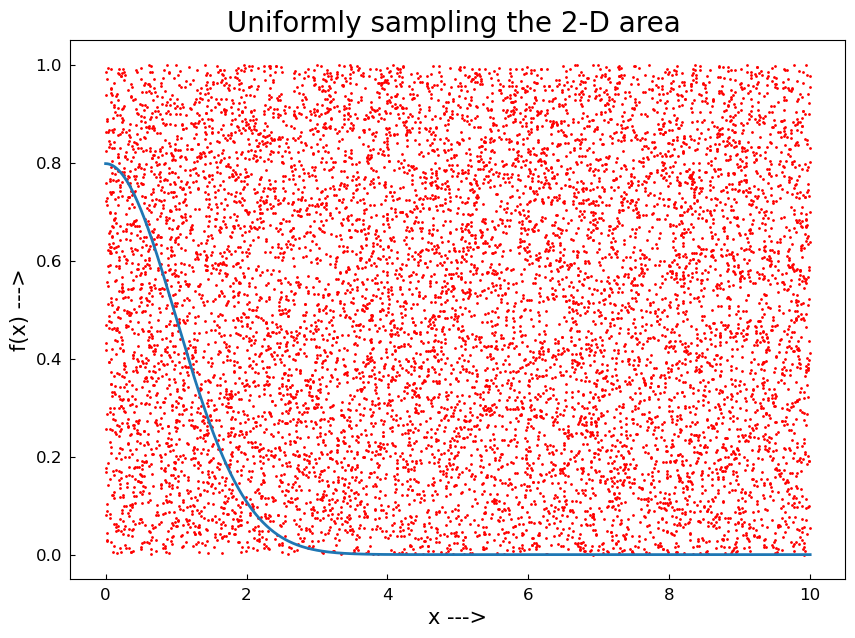

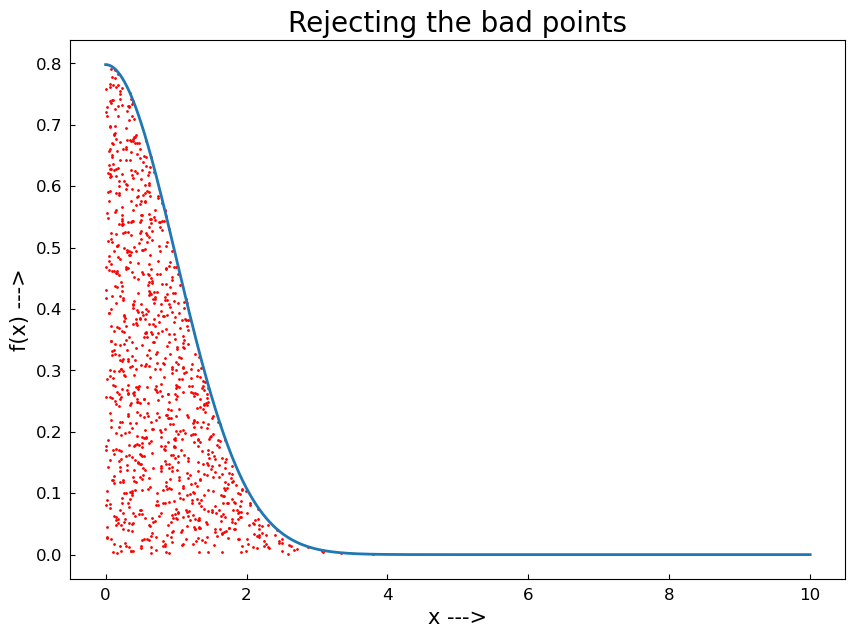

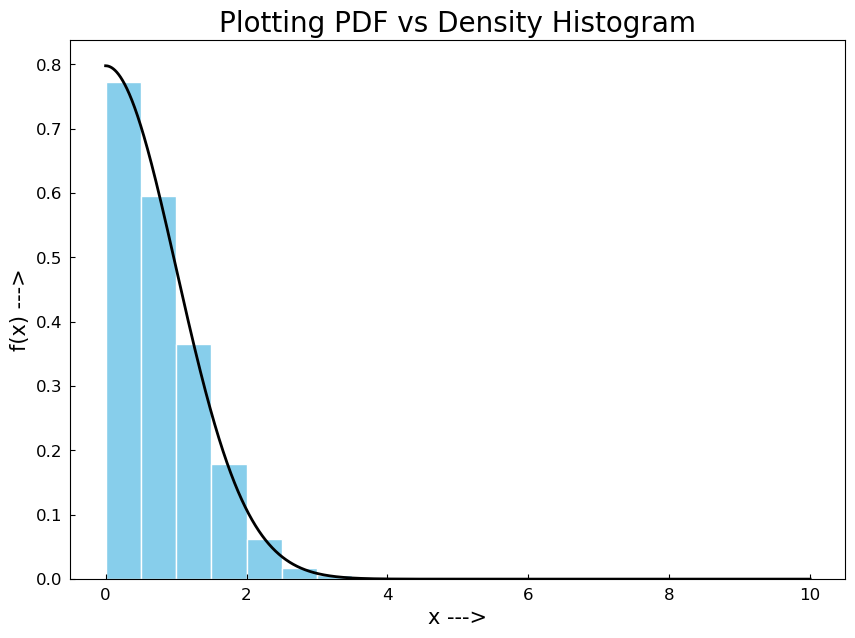

In [254]:
#Given PDF
def pdf(x):
    return np.sqrt(2/np.pi)*np.exp(-x*x/2)

#Sampling the 2-D area uniformly
x = np.random.rand(10000)*10
y = np.random.rand(10000)

#Plotting the uniform sampling
xvalues = np.linspace(0,10,10000)
yvalues = pdf(xvalues)
plt.figure(0)
plt.plot(xvalues,yvalues, linewidth = 2)
plt.scatter(x,y, s=1, color='red')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('f(x) --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Uniformly sampling the 2-D area ',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Accepting the appropriate points and rejecting others
x_accept = []
y_accept = []
for i in range(len(x)):
    if y[i] < pdf(x[i]):
        x_accept.append(x[i])
        y_accept.append(y[i])

#Plotting after rejection
plt.figure(1)
plt.plot(xvalues,yvalues, linewidth = 2)
plt.scatter(x_accept,y_accept, s=1, color='red')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('f(x) --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Rejecting the bad points',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#Plotting density histogram vs PDF
plt.figure(2)
plt.plot(xvalues,yvalues, linewidth = 2, color='black')
plt.hist(x_accept, range=(0,10), density = True, bins = 20, alpha = 1, color = 'skyblue', edgecolor='white')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('f(x) --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Plotting PDF vs Density Histogram',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Question:7

In [154]:
score = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]                         #Possible scores
obs1 = [4, 10, 10, 13, 20, 18, 18, 11, 13, 14, 13]                   #First set of observed counts
obs2 = [3, 7, 11, 15, 19, 24, 21, 17, 13, 9, 5]                      #Second set of observed counts
expec = [4, 8, 12, 16, 20, 24, 20, 16, 12, 8, 4]                     #Expected number of counts

#Evaluating the Chi-Squared statistic for both set of observations
chisq1 = 0
chisq2 = 0
for i in range(len(score)):
    chisq1 += (obs1[i] - expec[i])**2/(expec[i])
    chisq2 += (obs2[i] - expec[i])**2/(expec[i])

#Printing the values of Chi-Squared statistic
print('The value of Chi-Squared statistic for first set of observed counts is: ',chisq1)
print('The value of Chi-Squared statistic for second set of observed counts is: ',chisq2)

#Calculation the corresponding probabilities
prob1 = 1 - chi2.cdf(chisq1, 10)                                      #DOF=10
prob2 = 1 - chi2.cdf(chisq2, 10)                                      #DOF=10

#Characterizing the randomness of the first sample
if prob1<0.01 or prob1>0.99:
    print('First sample is not sufficiently random.')
elif 0.01<prob1<0.05 or 0.95<prob1<0.99:
    print('First sample is suspect.')
elif 0.05<prob1<0.10 or 0.90<prob1<0.95:
    print('First sample is almost suspect.')
elif 0.10<prob1<0.90:
    print('First sample is sufficiently random.')

#Characterizing the randomness of the second sample
if prob2<0.01 or prob2>0.99:
    print('Second sample is not sufficiently random.')
elif 0.01<prob2<0.05 or 0.95<prob2<0.99:
    print('Second sample is suspect.')
elif 0.05<prob2<0.10 or 0.90<prob2<0.95:
    print('Second sample is almost suspect.')
elif 0.10<prob2<0.90:
    print('Second sample is sufficiently random.')

The value of Chi-Squared statistic for first set of observed counts is:  29.491666666666667
The value of Chi-Squared statistic for second set of observed counts is:  1.1416666666666666
First sample is not sufficiently random.
Second sample is not sufficiently random.


# Question:8

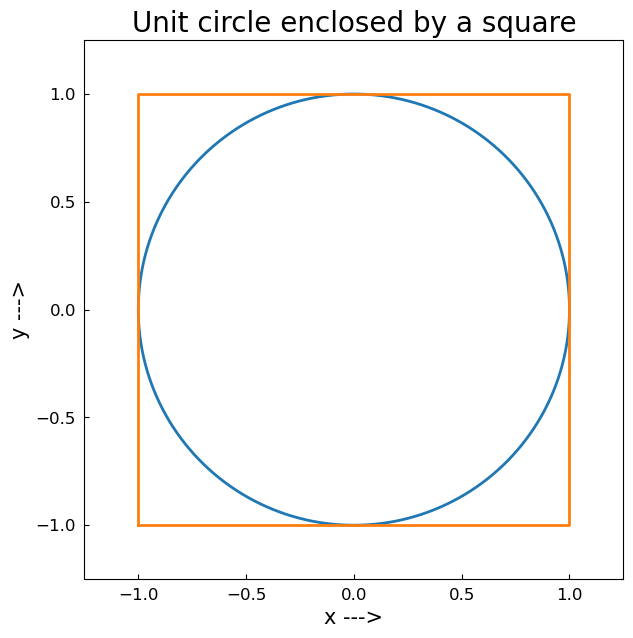

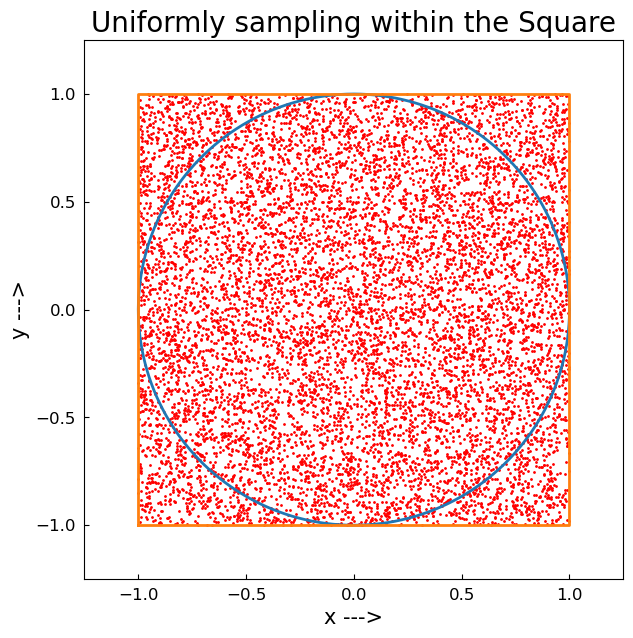

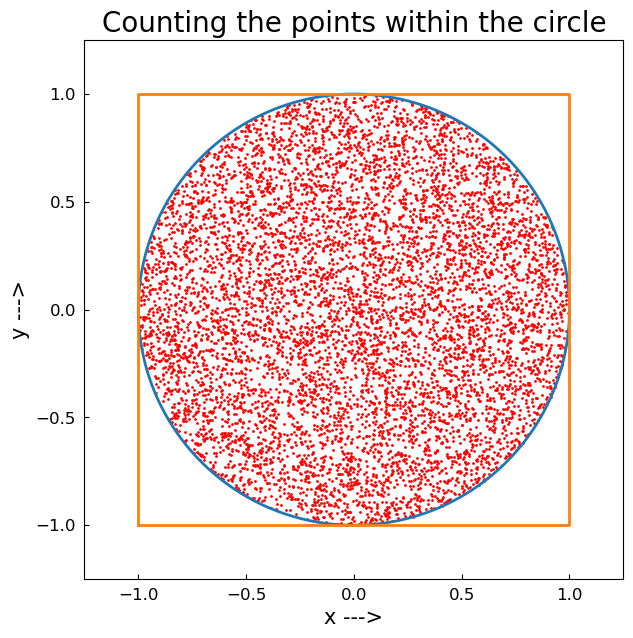

Number of points within the circle = 7896
Area of circle = 3.1584


In [391]:
#Defining coordinates for unit circle
theta = np.linspace(0, 2*np.pi, 10000)
xc = np.cos(theta)
yc = np.sin(theta)

#Defining coordinates of vertices of the enclosing square
xs = [-1, 1, 1, -1, -1]
ys = [-1, -1, 1, 1, -1]

#Plotting the circle and the square
plt.figure(0)
plt.plot(xc,yc, linewidth = 2)
plt.plot(xs,ys, linewidth = 2)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Unit circle enclosed by a square',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Uniformly sampling points within the square
xrand = -1 + 2*np.random.rand(10000)
yrand = -1 + 2*np.random.rand(10000)
plt.figure(1)
plt.scatter(xrand,yrand, color='red', s=1)
plt.plot(xc,yc, linewidth = 2)
plt.plot(xs,ys, linewidth = 2)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Uniformly sampling within the Square',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Accepting the points that lie within the circle and counting them
k = 0                                    #Counter
xgood = []
ygood = []
for i in range(len(xrand)):
    r = (xrand[i])**2 + (yrand[i])**2
    if r<=1:
        xgood.append(xrand[i])
        ygood.append(yrand[i])
        k += 1
plt.figure(2)
plt.scatter(xgood,ygood, color='red', s=1)
plt.plot(xc,yc, linewidth = 2)
plt.plot(xs,ys, linewidth = 2)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Counting the points within the circle',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Area of circle = k*(Area of square)/(Total number of points)
area2d = (k*4)/10000
print('Number of points within the circle =', k)
print('Area of circle =', area2d)

In [31]:
#Finding the volume of a general N-dim unit sphere

N = 10                                              #Number of dimensions
npoints = 100000                                    #Number of sample points

#Uniformly sampling the volume of the N-dim cube enclosing the N-dim sphere
xrand = np.zeros([npoints, N])
for i in range(npoints):
    for j in range(N):
        xrand[i,j] = -1 + 2*np.random.rand()

#Accepting the points that lie within the N-dim sphere and counting them
xgood = []
k = 0                                                #Counter
for i in range(npoints):
    r = np.linalg.norm(xrand[i])
    if r<=1:
        xgood.append(xrand[i])
        k += 1
xgood = np.array(xgood)

#Volume of N-dim sphere = k*(Volume of N-dim cube)/(Total number of points)
volNd = (k*(2**N))/(npoints)
print('Number of points within the',N,'-dim sphere =', k)
print('Volume of the',N,'-dim sphere =', volNd)

Number of points within the 10 -dim sphere = 260
Volume of the 10 -dim sphere = 2.6624


# Question:9

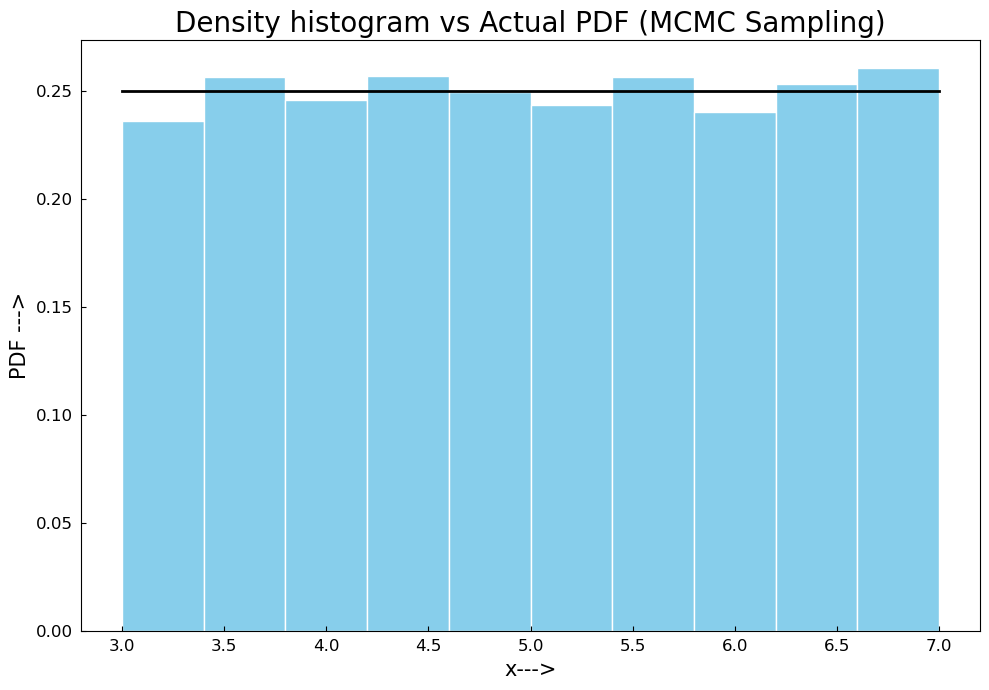

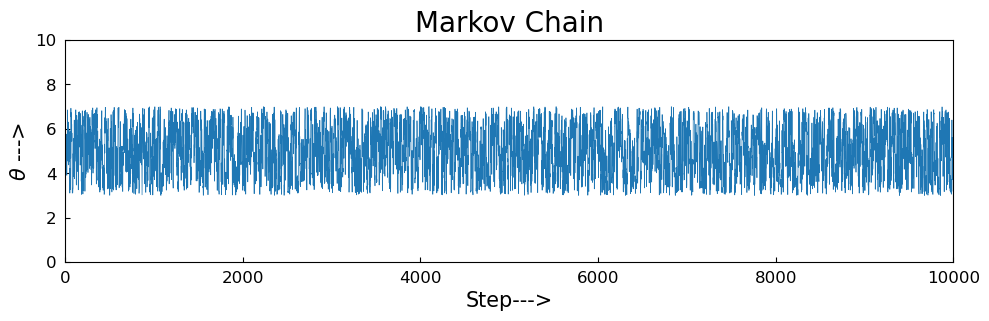

In [67]:
#Target distribution
def target(x):
    if 3<=x<=7:
        return (1/4)
    else:
        return (0)

#Sample-Size
npoints = 10000

#Let the proposal pdf be Gaussian with mean 'theta' and variance 1

#Metropolis Algorithm
theta = [4]
good_points = []
bad_points = []
index = np.zeros(npoints)
for i in range(npoints):
    theta_prime = theta[i] + np.random.standard_normal()
    r = np.random.rand()
    index[i] = i
    if target(theta_prime)/target(theta[i]) > r:
        theta.append(theta_prime)
        good_points.append(theta_prime)
    else:
        theta.append(theta[i])
        bad_points.append(theta[i])
theta.pop()

#Plotting the density histogram vs actual PDF
plt.figure(0)
plt.hist(theta, range=(3,7), density=True, bins=10, alpha=1, color='skyblue', edgecolor='white')
plt.plot([3,7],[1/4,1/4], linewidth=2, color='black')
plt.xlabel('x--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('PDF --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title(r'Density histogram vs Actual PDF (MCMC Sampling)',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.rcParams['figure.figsize'] = [10,7]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#Plotting the Markov chain
plt.figure(1)
plt.plot(index,theta, linewidth = 0.5)
plt.xlim(0,10000)
plt.ylim(0,10)
plt.xlabel('Step--->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel(r'$\theta $ --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Markov Chain',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.rcParams['figure.figsize'] = [10,7]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10,7]
plt.gca().set_aspect(250)
plt.show()

# Question:10

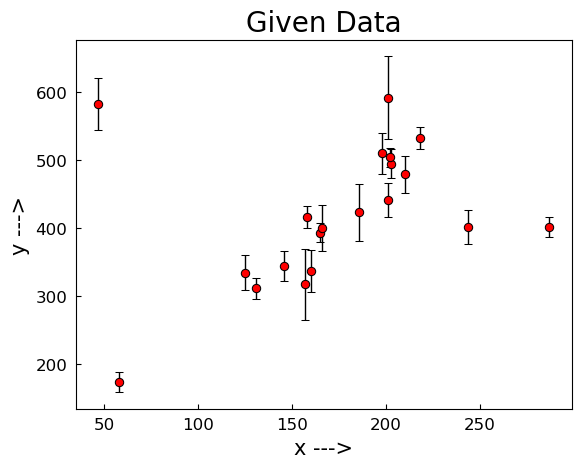

In [8]:
#Importing data from 'data.txt'
sn, x, y, yerr = np.loadtxt('data.txt', unpack=True, comments='#')              #sn = serial number

#Plotting the data with error bars
plt.errorbar(x, y, yerr, fmt='o', capsize=3, ecolor='black', elinewidth =1, mfc='red', mec='black', mew=0.75)
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Given Data',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.rcParams['figure.figsize'] = [10,7]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rcParams['figure.figsize'] = [10,7]
plt.show()

In [23]:
#Given model
def model(theta, x):
    a,b,c = theta
    return (a*x*x + b*x + c)

#Defining ln(Likelihood) [Actually negatice of ln(Likelihood)]
def ln_likelihood(theta, x, y, yerr):
    model_y = model(theta, x)
    sigma2 = yerr
    return (np.sum(((y - model_y)**2)/(sigma2) + np.log(2*np.pi*sigma2)))/2

#Defining ln(Prior)  [Taking a uniform prior]
def ln_prior(theta):
    return 0

#Defining ln(Posterior) [Un-normalized]
def ln_posterior(theta, x, y, yerr):
    lp = ln_prior(theta)
    if not np.isfinite(lp):                               #If Prior=0, then Posterior=0 as well.
        return -np.inf
    return lp - ln_likelihood(theta, x, y, yerr)

ndim = 3                                                  #Dimensions of parameter space
nchains = 50                                              #Number of Markov Chains
nsteps = 4000                                             #Number of steps in each chain

#Initializing the chains near the optimum of the ln(Likelihood) function
guess = (1.0, 1.0, 1.0)
soln = minimize(ln_likelihood, guess, args=(x,y,yerr))
pos = soln.x + 1e-4 * np.random.randn(nchains, ndim)

#Creating the sampler
sampler = emcee.EnsembleSampler(nchains, ndim, ln_posterior, args=(x, y, yerr))

#Running the MCMC sampler
sampler.run_mcmc(pos, nsteps)

#Obtaining the results
samples = sampler.get_chain()

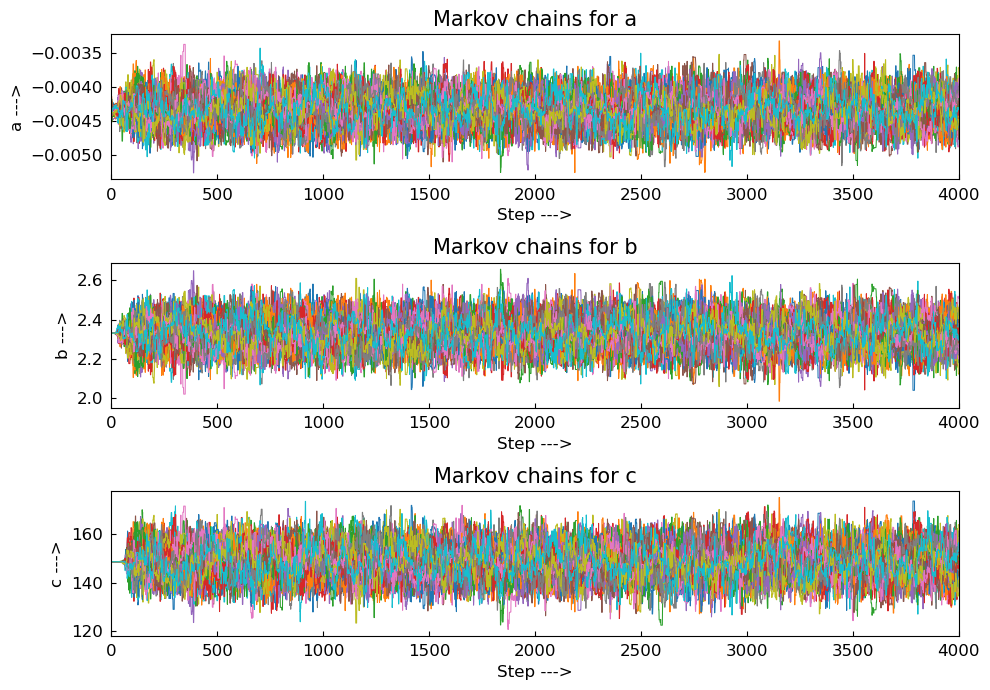

In [25]:
#Plotting the Markov Chains

plt.subplot(3,1,1)
plt.plot(samples[:,:,0], linewidth = 0.75)
plt.xlabel('Step --->',rotation = 0, fontsize = 12 , labelpad = 4)
plt.ylabel('a --->',rotation = 90, fontsize = 12 , labelpad = 4)
plt.xlim(0,4000)
plt.title('Markov chains for a',fontsize = 15)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(3,1,2)
plt.plot(samples[:,:,1], linewidth = 0.75)
plt.xlabel('Step --->',rotation = 0, fontsize = 12 , labelpad = 4)
plt.ylabel('b --->',rotation = 90, fontsize = 12 , labelpad = 4)
plt.xlim(0,4000)
plt.title('Markov chains for b',fontsize = 15)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(3,1,3)
plt.plot(samples[:,:,2], linewidth = 0.75)
plt.xlabel('Step --->',rotation = 0, fontsize = 12 , labelpad = 4)
plt.ylabel('c --->',rotation = 90, fontsize = 12 , labelpad = 4)
plt.xlim(0,4000)
plt.title('Markov chains for c',fontsize = 15)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

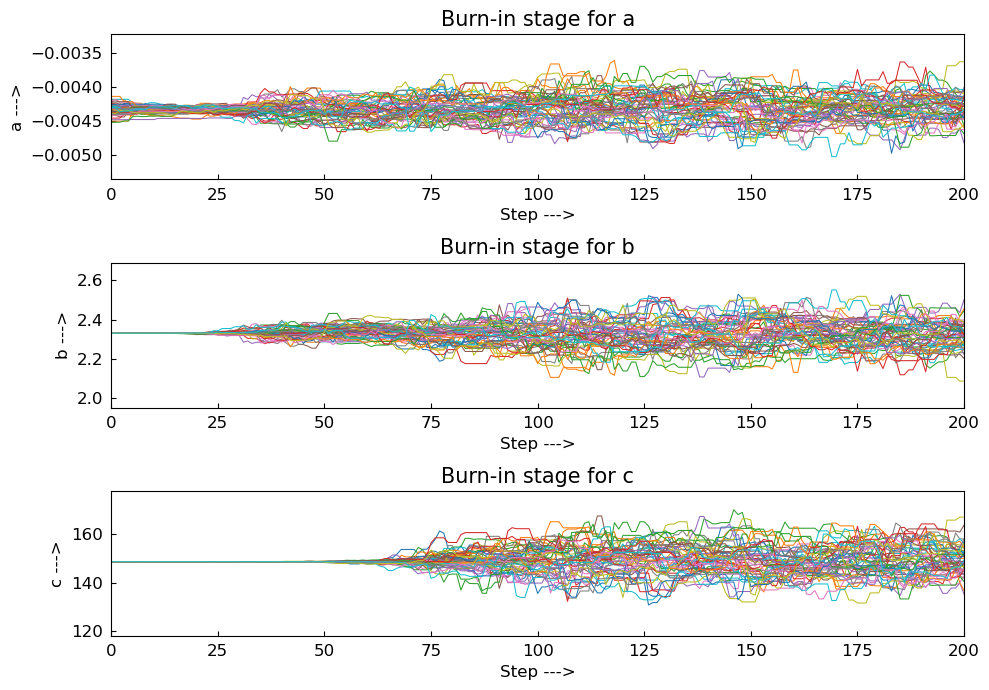

In [26]:
#Plotting the Burn-in stages

plt.subplot(3,1,1)
plt.plot(samples[:,:,0], linewidth = 0.75)
plt.xlabel('Step --->',rotation = 0, fontsize = 12 , labelpad = 4)
plt.ylabel('a --->',rotation = 90, fontsize = 12 , labelpad = 4)
plt.xlim(0,200)
plt.title('Burn-in stage for a',fontsize = 15)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(3,1,2)
plt.plot(samples[:,:,1], linewidth = 0.75)
plt.xlabel('Step --->',rotation = 0, fontsize = 12 , labelpad = 4)
plt.ylabel('b --->',rotation = 90, fontsize = 12 , labelpad = 4)
plt.xlim(0,200)
plt.title('Burn-in stage for b',fontsize = 15)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(3,1,3)
plt.plot(samples[:,:,2], linewidth = 0.75)
plt.xlabel('Step --->',rotation = 0, fontsize = 12 , labelpad = 4)
plt.ylabel('c --->',rotation = 90, fontsize = 12 , labelpad = 4)
plt.xlim(0,200)
plt.title('Burn-in stage for c',fontsize = 15)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

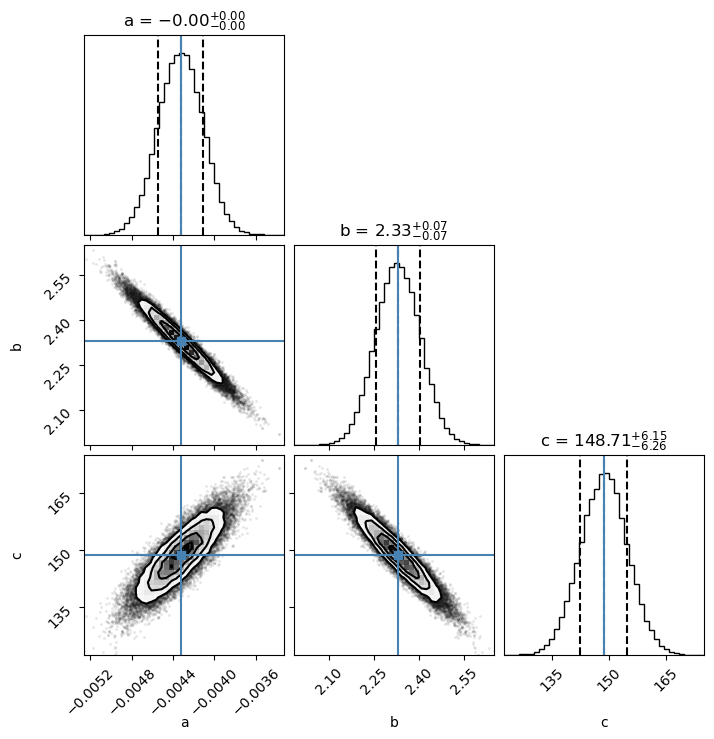

The best-fit value of a is: -0.004326454662727946
The 16th and 84th percentiles are: -0.004543460882287058 -0.004112371044751968

The best-fit value of b is: 2.329126656929712
The 16th and 84th percentiles are: 2.2557564150618967 2.403831391638665

The best-fit value of c is: 148.70670970145517
The 16th and 84th percentiles are: 142.4471642789464 154.85208098184603



In [61]:
#Discarding the burn-in stages
samples = sampler.get_chain(discard=200, thin=5, flat=True)

#The 'best-fit' values are the medians of the posterior PDF
medians = np.median(samples, axis=0)
a_true, b_true, c_true = medians

#Plotting the posterior PDF along with 1-sigma uncerainties using corner
fig = corner.corner(samples, bins=40, labels=["a", "b","c"], truths =[a_true, b_true, c_true], quantiles = [0.16,0.5,0.84], show_titles = True)
plt.show()

#The 'best-fit' values 
a = corner.quantile(samples[:,0], [0.16, 0.5, 0.84], weights=None)
b = corner.quantile(samples[:,1], [0.16, 0.5, 0.84], weights=None)
c = corner.quantile(samples[:,2], [0.16, 0.5, 0.84], weights=None)
print('The best-fit value of a is:',a[1])
print('The 16th and 84th percentiles are:',a[0], a[2])
print()
print('The best-fit value of b is:',b[1])
print('The 16th and 84th percentiles are:',b[0], b[2])
print()
print('The best-fit value of c is:',c[1])
print('The 16th and 84th percentiles are:',c[0], c[2])
print()

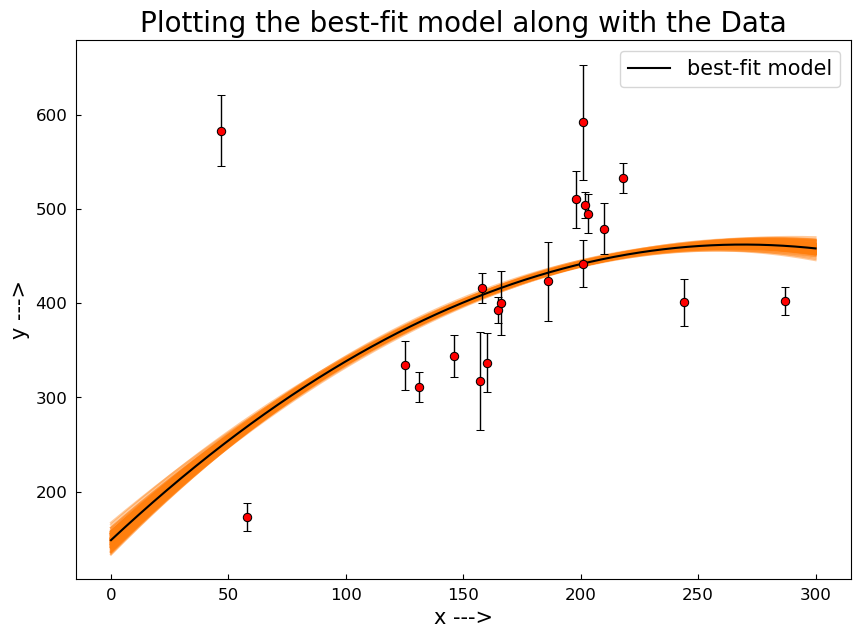

In [70]:
#Plotting data with the best-fit model and 200 randomly chosen models
indices = np.random.randint(len(samples),size=200)
x0 = np.linspace(0,300,1000)
for i in indices:
  sample = samples[i]
  plt.plot(x0,np.dot(np.vander(x0,3),sample[:3]),'C1',alpha=0.4)
plt.plot(x0,model([a_true,b_true,c_true],x0),'k',label='best-fit model')
plt.errorbar(x, y, yerr, fmt='o', capsize=3, ecolor='black', elinewidth =1, mfc='red', mec='black', mew=0.75)
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4)
plt.title('Plotting the best-fit model along with the Data',fontsize = 20)
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.rcParams['figure.figsize'] = [10,7]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rcParams['figure.figsize'] = [10,7]
plt.legend(fontsize=15)
plt.show()